In [45]:
# Project part from Jesus 

In [46]:
import pandas as pd
import numpy as np


In [47]:
# Load the Dataset
df = pd.read_csv("king_ country_ houses_aa.csv")

backup_house_data = df.copy()
display(df.shape)
df.info()


(21613, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# After checking the structure
We can observe that there are no missing values, apart from date, we have numerical columns

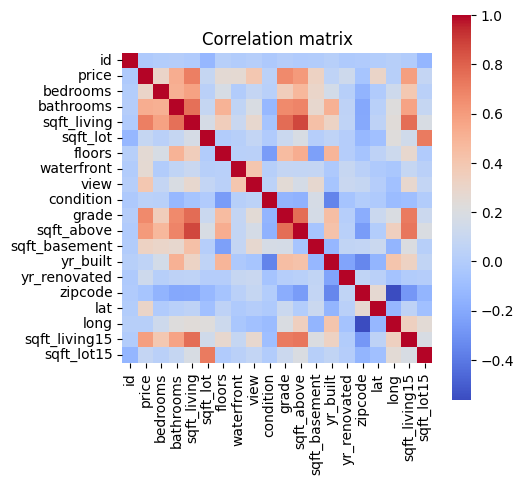

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

# Only the numerical columns
corr = df.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, cmap="coolwarm", square=True)
plt.title("Correlation matrix")
plt.show()


# Interpretation:

The strongest predictors of price are house size (sqft_living, sqft_above), grade, bathrooms, and view.

Many of the size-related features (sqft_living, sqft_above, sqft_living15, bathrooms) are highly correlated with each other, which creates redundancy.

Several features show little or no correlation with price such as id, yr_built, and sqft_lot,
so they contribute little predictive value.

In [49]:
df = df.drop("date", axis=1)

#The date column was removed because it is not a structural feature and could add noise.
#The model predicts house prices using only physical and locational characteristics.

In [50]:
# Average price per zipcode
zipcode_avg = df.groupby("zipcode")["price"].mean()

# Map each row to the average price of its zipcode
df["zipcode_price_group"] = df["zipcode"].map(zipcode_avg)

# Remove original zipcode column
df = df.drop("zipcode", axis=1)

In [51]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_price_group
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,2.343263e+05
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2.342840e+05
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,3.594832e+05
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,4.935525e+05
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.452315e+05
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2.160607e+06


In [52]:
# Check dataset structure
display(df.head())

# Count the NULL values in total
display(df.isnull().sum())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_price_group
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,310612.755725
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,469455.770732
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,462480.035336
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,551688.673004
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,685605.775510


id                     0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
zipcode_price_group    0
dtype: int64

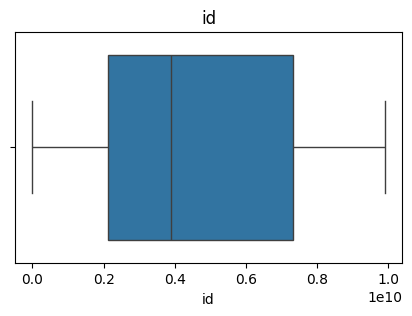

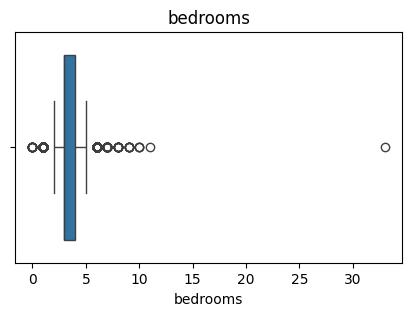

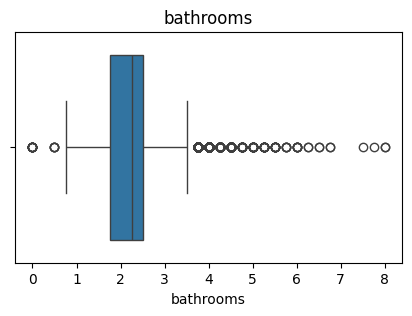

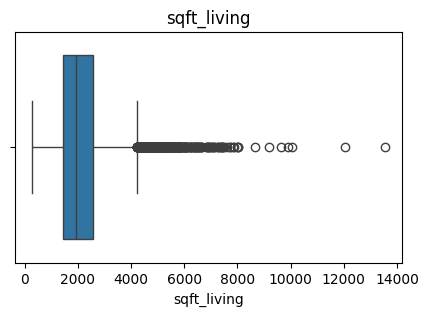

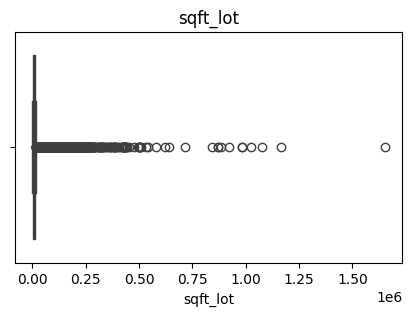

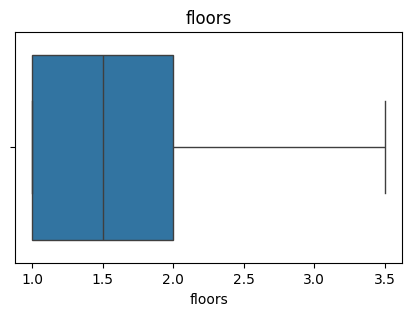

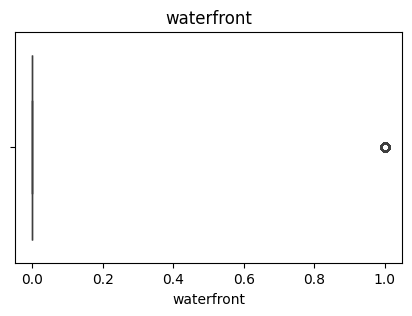

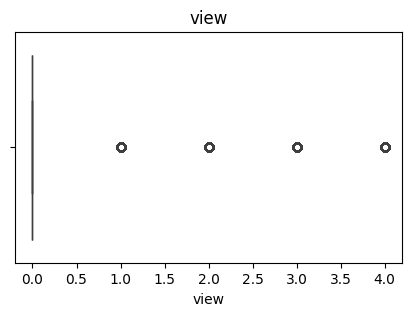

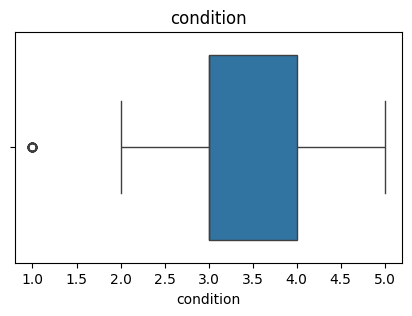

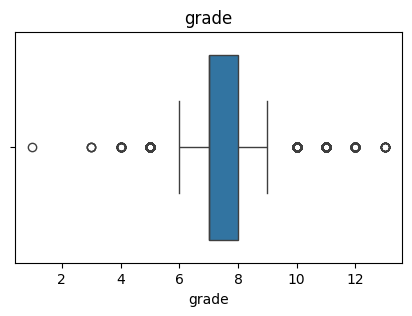

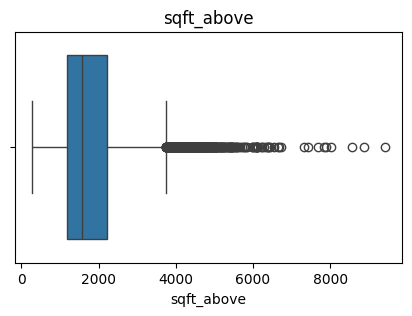

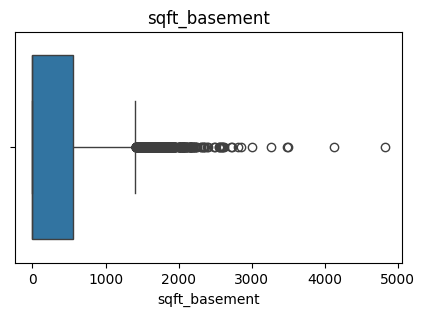

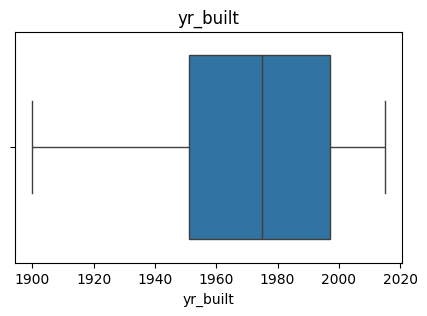

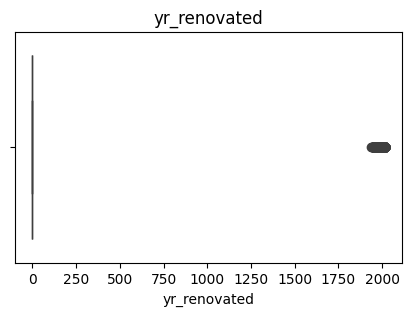

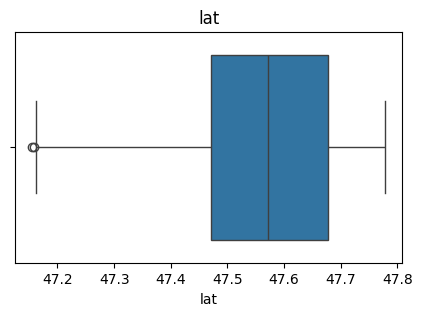

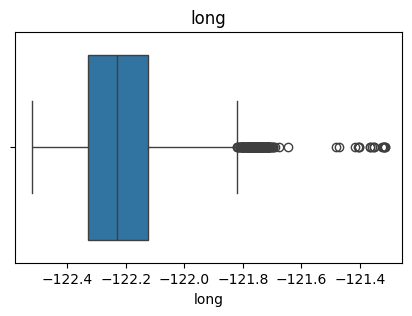

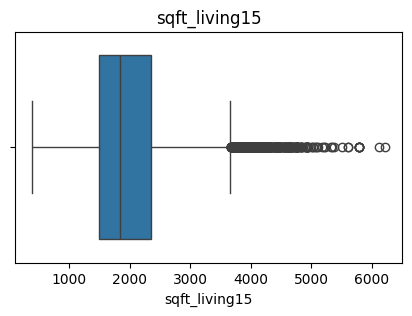

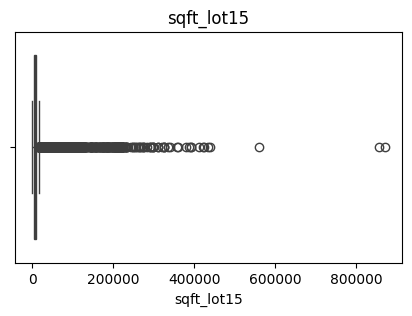

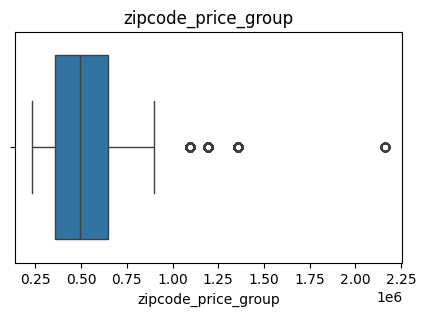

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# We plot the columns, to detect outliers
for col in df.drop("price", axis=1).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [54]:
# Remove outliers
df = df[df['bedrooms'] <= 10]
df = df[df['condition'] != 1]

limits = {
    'bathrooms': 7,
    'sqft_above': 7000,
    'sqft_basement': 4000,
    'sqft_living15': 6000,
    'sqft_lot': 500000,
    'sqft_lot15': 500000
}
# We apply the changes to limit the values
for col, limit in limits.items():
    df = df[df[col] <= limit]

# Feature engineering
We could perfom feature engineering, although, for this model seems to not enchance,
in fact, it makes it worse

This would be one way to implement feature engineering:

df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']
df['living_ratio'] = df['sqft_living'] / df['sqft_lot']

columns = ["sqft_living","sqft_lot","bedrooms","bathrooms","sqft_basement","sqft_living"]
df.drop(columns,axis=1)

In [55]:
# Log transformation for skewed features
skewed_features = ['sqft_lot', 'sqft_lot15']
for col in skewed_features:
    df[col] = np.log1p(df[col])

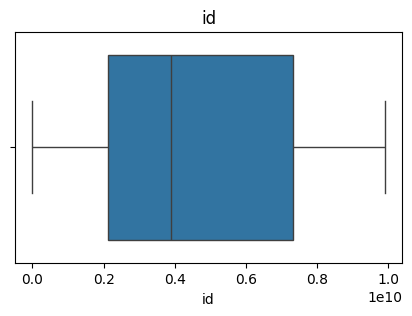

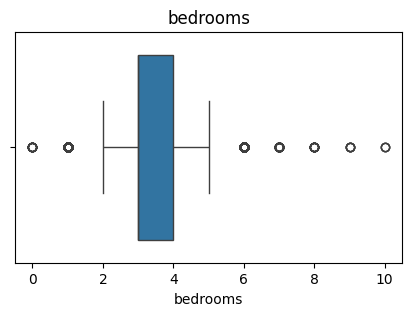

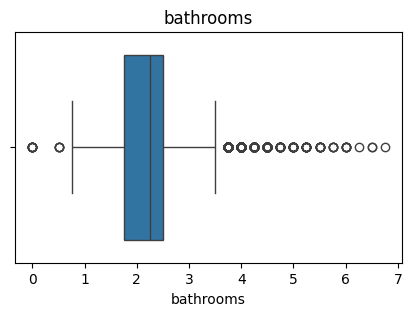

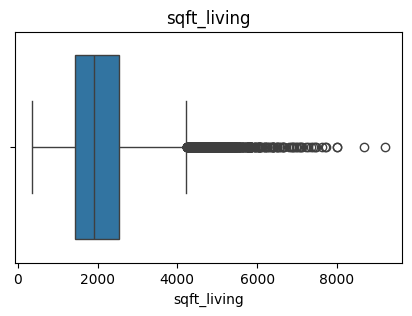

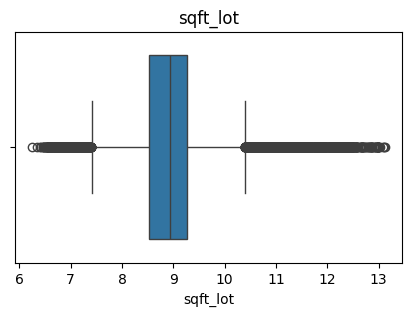

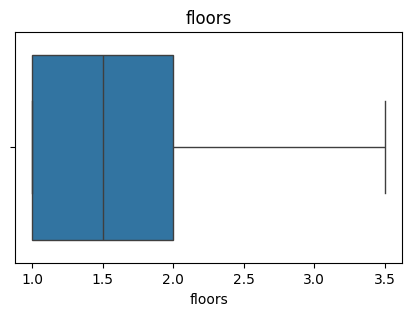

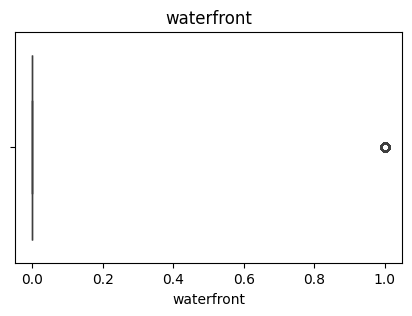

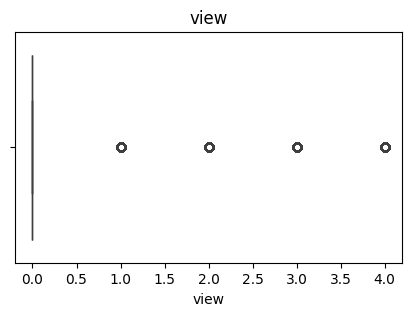

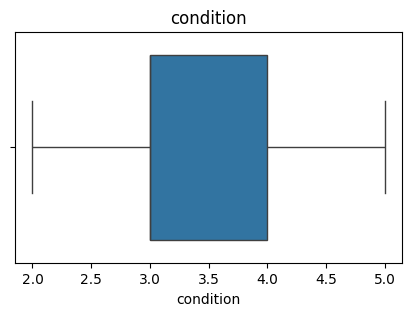

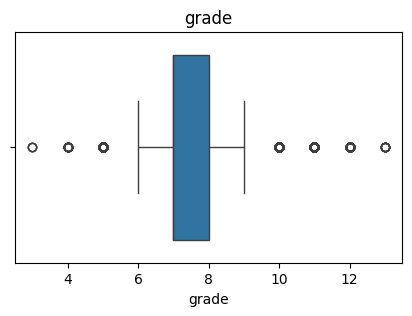

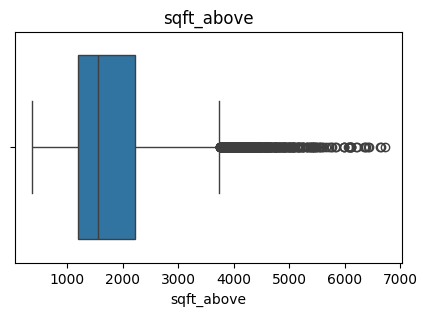

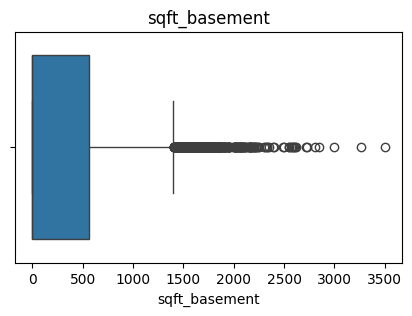

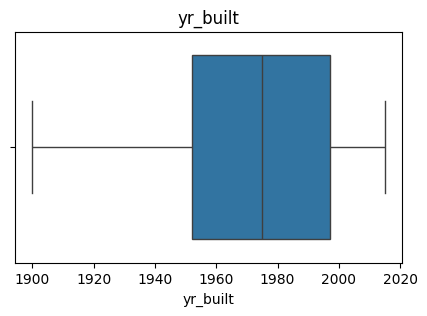

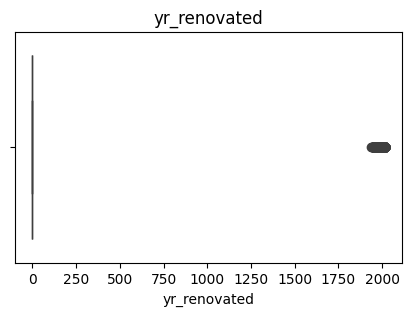

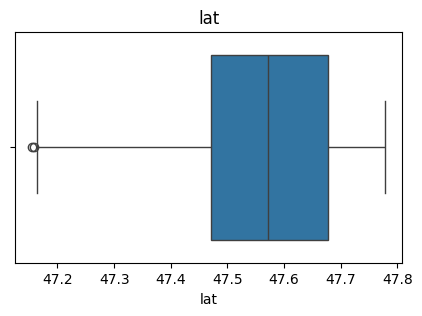

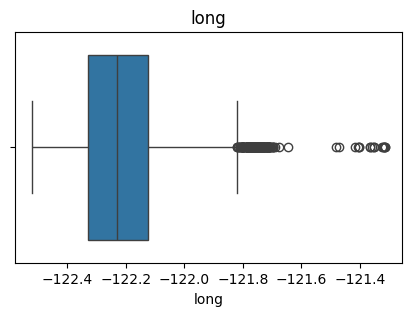

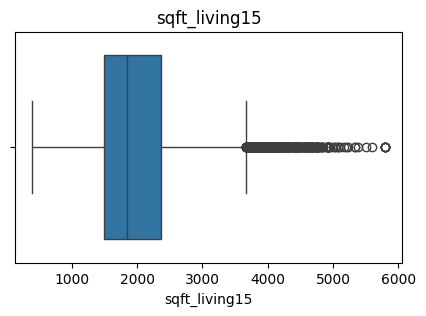

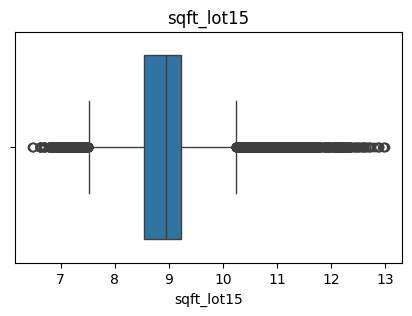

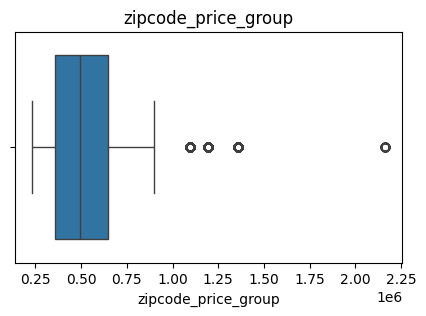

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.drop("price", axis=1).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [57]:
# Features
X = df.drop("price", axis=1)
# Target
y = df["price"]

# Handle categorical variables (encoding).
X = pd.get_dummies(X, drop_first = True )



In [58]:
# Train the split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)



 

In [59]:
# Handle infinities or NaN

# Get means for X_train and X_test and replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values ​​with their respective averages
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)  


In [60]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Use KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", r2)
print("MSE:", mse)

R2: 0.8151800091473556
MSE: 22911287080.24129


In [62]:
# Evaluate different K
errors = {}
counter = 0
for k in range(1, 17):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    counter +=1
    errors[k] = f"for {counter} neighbors, MSE is around {round(mean_squared_error(y_test, y_pred),2)}"
    print(f"When k = {k} => R2 = {round(r2_score(y_test, y_pred),2)}, MSE={round(mean_squared_error(y_test, y_pred),2)}")
errors


When k = 1 => R2 = 0.72, MSE=34938517138.52
When k = 2 => R2 = 0.78, MSE=27536702520.54
When k = 3 => R2 = 0.8, MSE=25049141551.37
When k = 4 => R2 = 0.81, MSE=23451597471.76
When k = 5 => R2 = 0.82, MSE=22911287080.24
When k = 6 => R2 = 0.82, MSE=22210208757.61
When k = 7 => R2 = 0.82, MSE=22099948937.55
When k = 8 => R2 = 0.82, MSE=22086089797.81
When k = 9 => R2 = 0.82, MSE=21924715141.57
When k = 10 => R2 = 0.82, MSE=21998157319.67
When k = 11 => R2 = 0.82, MSE=21868697024.28
When k = 12 => R2 = 0.82, MSE=22063282263.79
When k = 13 => R2 = 0.82, MSE=21950523819.96
When k = 14 => R2 = 0.82, MSE=22004178464.64
When k = 15 => R2 = 0.82, MSE=22085357687.94
When k = 16 => R2 = 0.82, MSE=22206093399.68


{1: 'for 1 neighbors, MSE is around 34938517138.52',
 2: 'for 2 neighbors, MSE is around 27536702520.54',
 3: 'for 3 neighbors, MSE is around 25049141551.37',
 4: 'for 4 neighbors, MSE is around 23451597471.76',
 5: 'for 5 neighbors, MSE is around 22911287080.24',
 6: 'for 6 neighbors, MSE is around 22210208757.61',
 7: 'for 7 neighbors, MSE is around 22099948937.55',
 8: 'for 8 neighbors, MSE is around 22086089797.81',
 9: 'for 9 neighbors, MSE is around 21924715141.57',
 10: 'for 10 neighbors, MSE is around 21998157319.67',
 11: 'for 11 neighbors, MSE is around 21868697024.28',
 12: 'for 12 neighbors, MSE is around 22063282263.79',
 13: 'for 13 neighbors, MSE is around 21950523819.96',
 14: 'for 14 neighbors, MSE is around 22004178464.64',
 15: 'for 15 neighbors, MSE is around 22085357687.94',
 16: 'for 16 neighbors, MSE is around 22206093399.68'}

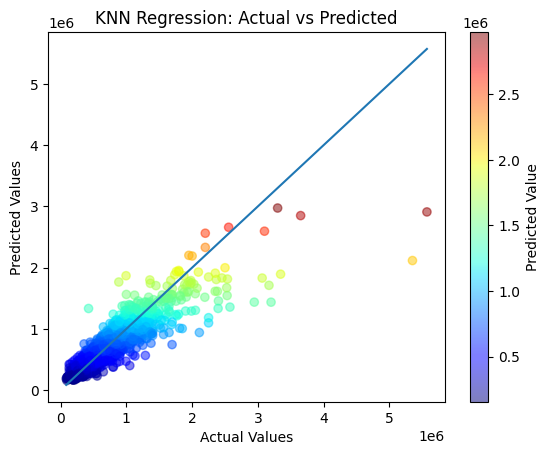

In [63]:

y_true = y_test

import matplotlib.cm as cm
y_true = np.ravel(y_true)
y_pred = np.ravel(y_pred)

plt.figure()
plt.scatter(y_true, y_pred,  c=y_pred, cmap='jet', alpha =0.5)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs Predicted")
plt.colorbar(label='Predicted Value')
plt.show()

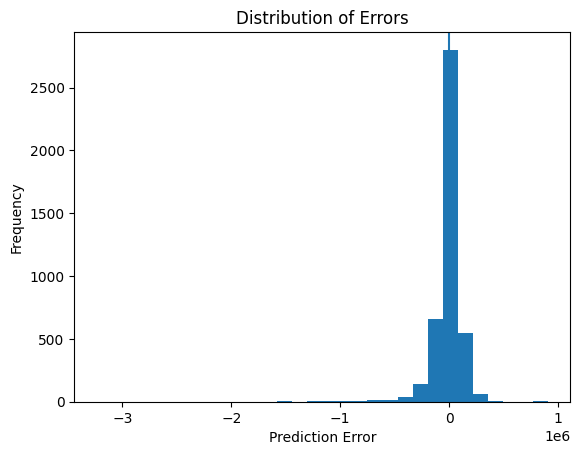

In [64]:
errors = y_pred - y_true
plt.figure()
plt.hist(errors, bins=30)
plt.axvline(0)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")
plt.show()

In [65]:

df.to_csv("cleaned_data_jesus.csv", index=False)
print("The dataset cleaned has been saved")

The dataset cleaned has been saved
